In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Tatacoffee13_21.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# VARMA - Vector Autoregression with Moving Average
The only difference with VAR model is that the error terms are given the moving averag representation of order(q)



In [27]:
#pip install pmdarima

## Import Libraries and Load the Data

In [3]:
import numpy as np 
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
%matplotlib inline

# time series related 
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import mse,rmse
from statsmodels.tsa.statespace.varmax import VARMAX,VARMAXResults

# handle warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [4]:
# Load datasets
df = pd.read_csv('Tatacoffee13_21.csv',index_col=0, parse_dates=True)

sp = pd.read_csv('varforecasted_28.csv',index_col=0, parse_dates=True)


In [5]:
df.head()

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65


In [6]:
sp.head()

,Close,High,Open,Low
0,0.651947,0.540348,0.637173,0.684598
1,0.646940,0.541544,0.631281,0.672035
2,0.640741,0.539336,0.626666,0.664086
3,0.634307,0.534927,0.621015,0.656887
4,0.628102,0.529992,0.615234,0.650382


In [7]:
df = df
df.head()

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65


In [8]:
# drop the null values if any
df.dropna(inplace=True)
df.shape

(2225, 4)

## Plot the data

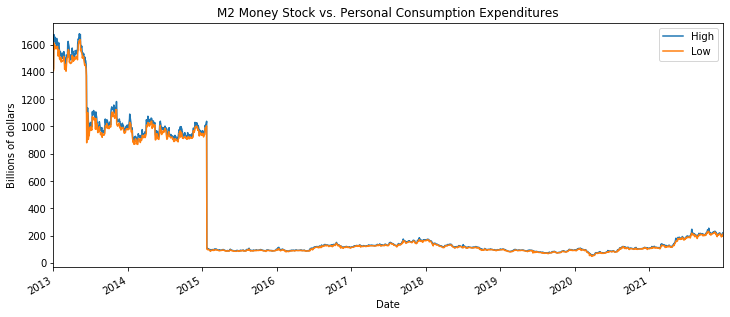

In [9]:
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel= 'Billions of dollars'
xlabel= ''

ax = df['High'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Low'].plot(legend=True);

## Test for Stationarity

Refer the other notebook https://www.kaggle.com/prakharprasad/time-series-vector-autoregression where the test for stationarity was done on both Money as well as the Spending feature. Order 2 difference makes the data stationary. For sake of brevity, I am skipping this step. 

## Decide the order of the VARMA(p,q) 

In [11]:
auto_arima(df['High'],maxiter=100)

d:\Users\kaasa\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Users\kaasa\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Users\kaasa\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Users\kaasa\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=

ValueError: Could not successfully fit ARIMA to input data. It is likely your data is non-stationary. Please induce stationarity or try a different range of model order params. If your data is seasonal, check the period (m) of the data.

In [12]:
auto_arima(df['High'],maxiter=100)

d:\Users\kaasa\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Users\kaasa\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Users\kaasa\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Users\kaasa\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=

ValueError: Could not successfully fit ARIMA to input data. It is likely your data is non-stationary. Please induce stationarity or try a different range of model order params. If your data is seasonal, check the period (m) of the data.

Order (1,2) is preferred for VARMA. The last term or the third terms is the differencing which will be applied already using differencing. 

In [13]:
df_transformed = df.diff().diff() # 2nd order difference
df_transformed = df_transformed.dropna() # remove the NaNs introduced due to differencing
df_transformed.head()

,Open,High,Low,Close
Date,,,,
2013-01-03,201.15,-151.40,189.05,-173.50
2013-01-04,-216.35,-93.45,-235.35,-65.95
2013-01-07,-42.95,57.90,29.35,63.75
2013-01-08,67.75,4.75,36.40,12.95
2013-01-09,13.10,-36.80,-24.55,-51.80


In [14]:
len(df_transformed)

2223

## Train Test Split

In [15]:
nobs = 12 # The last 12 months will be the test data. At least 1 year would be a good choice
train = df_transformed[0:-nobs]
test = df_transformed[-nobs:]

## Fit the VARMA(1,2) Model

In [16]:
model = VARMAX(train, order=(1,2), trend='c') # c indicates a constant trend
results = model.fit(maxiter=1000, disp=False)
results.summary()

d:\Users\kaasa\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
d:\Users\kaasa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Dep. Variable:,"['Open', 'High', 'Low', 'Close']",No. Observations:,2211
Model:,"VARMA(1,2)",Log Likelihood,-34054.317
,+ intercept,AIC,68232.634
Date:,"Tue, 12 Apr 2022",BIC,68586.108
Time:,15:28:29,HQIC,68361.764
Sample:,0,,
,- 2211,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"6.98, 57.83, 127.53, 191.07",Jarque-Bera (JB):,"146253142.49, 618223.36, 2159833.80, 73997.35"
Prob(Q):,"0.01, 0.00, 0.00, 0.00",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.01, 0.03, 0.02, 0.03",Skew:,"-31.08, -3.60, -3.48, -1.20"


## Predict the next 12 values

In [17]:
df_forecast = results.forecast(12)
df_forecast

d:\Users\kaasa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,Open,High,Low,Close
2211,-1.605172,-7.617211,-2.259483,-6.227433
2212,-0.261216,1.033175,-0.023944,1.030947
2213,0.388332,-0.574869,0.215381,-0.521733
2214,-0.317146,0.127284,-0.266073,0.160945
2215,0.230474,-0.173669,0.194198,-0.114628
2216,-0.128595,-0.039532,-0.158799,-0.014071
2217,0.078713,-0.107599,0.081253,-0.047458
2218,-0.026724,-0.066169,-0.069047,-0.035853
2219,0.018723,-0.094818,0.019306,-0.042165
2220,0.004405,-0.074426,-0.030176,-0.036603


## Invert the Transformations 
The data used for prediction was of 2nd order difference. The forecast would also be similar and hence it needs to be inverted to retrieve the true values which we can compare the original Money and Spending in the last 12 months dataframe. 

To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

**This was the toughest part to figure out. Best way is to take a small dataset and try this out manually, come out with the step or formula and generalize on the entire dataframe.**

In [18]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Open'] = (df['High'].iloc[-nobs-1]-df['High'].iloc[-nobs-2]) + df_forecast['High'].cumsum()
# Now build the forecast values from the first difference set
df_forecast['Close'] = df['High'].iloc[-nobs-1] + df_forecast['High'].cumsum()

In [19]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Close'] = (df['Low'].iloc[-nobs-1]-df['Low'].iloc[-nobs-2]) + df_forecast['Low'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['Close'] = df['Low'].iloc[-nobs-1] + df_forecast['Low'].cumsum()

In [20]:
df_forecast

,Open,High,Low,Close
2211,-3.367211,-7.617211,-2.259483,209.840517
2212,-2.334036,1.033175,-0.023944,209.816573
2213,-2.908905,-0.574869,0.215381,210.031954
2214,-2.781620,0.127284,-0.266073,209.765882
2215,-2.955289,-0.173669,0.194198,209.960079
2216,-2.994821,-0.039532,-0.158799,209.801280
2217,-3.102420,-0.107599,0.081253,209.882533
2218,-3.168590,-0.066169,-0.069047,209.813486
2219,-3.263407,-0.094818,0.019306,209.832792
2220,-3.337833,-0.074426,-0.030176,209.802617


In [21]:
pd.concat([df.iloc[-12:],df_forecast[['Low','Close']]],axis=1)

,Open,High,Low,Close,Low,Close
1970-01-01 00:00:00.000002211,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002212,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002213,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002214,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002215,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002216,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002217,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002218,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002219,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002220,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.describe().round()

,Open,High,Low,Close
count,2225.0,2225.0,2225.0,2225.0
mean,341.0,346.0,336.0,340.0
std,430.0,437.0,424.0,429.0
min,49.0,51.0,48.0,49.0
25%,93.0,94.0,91.0,92.0
50%,119.0,121.0,117.0,119.0
75%,212.0,215.0,208.0,212.0
max,1651.0,1680.0,1637.0,1648.0


## Plot the results

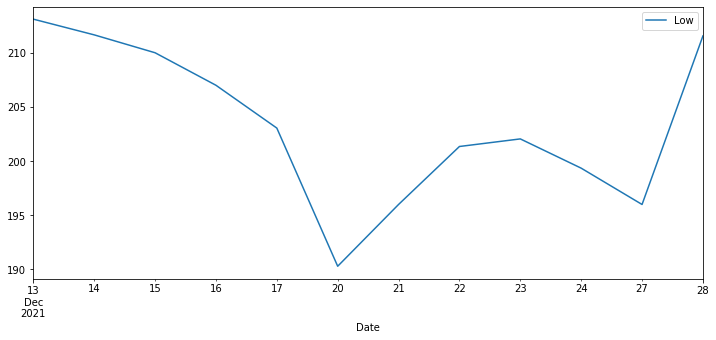

In [23]:
df['Low'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)


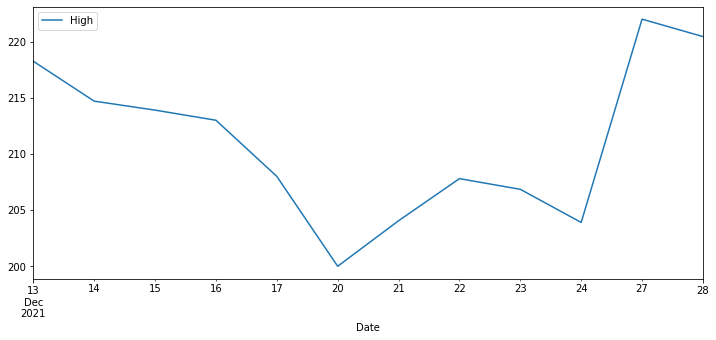

In [24]:
df['High'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)


## Model Evaluation

In [25]:
RMSE1 = rmse(df['High'][-nobs:], df_forecast['Low'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 211.383


In [26]:
RMSE2 = rmse(df['Open'][-nobs:], df_forecast['Close'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 7.656


# Summary

**The VARMA model fits very poorly for this dataset. Perhaps there is no good relationship between the Spending and and the Personal Disposable Income atleast for the period that I investigated here. Next step could be to compare the results to the ARMA or other models.**